<a href="https://colab.research.google.com/github/onuralpArsln/InfoBits/blob/main/bladeDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

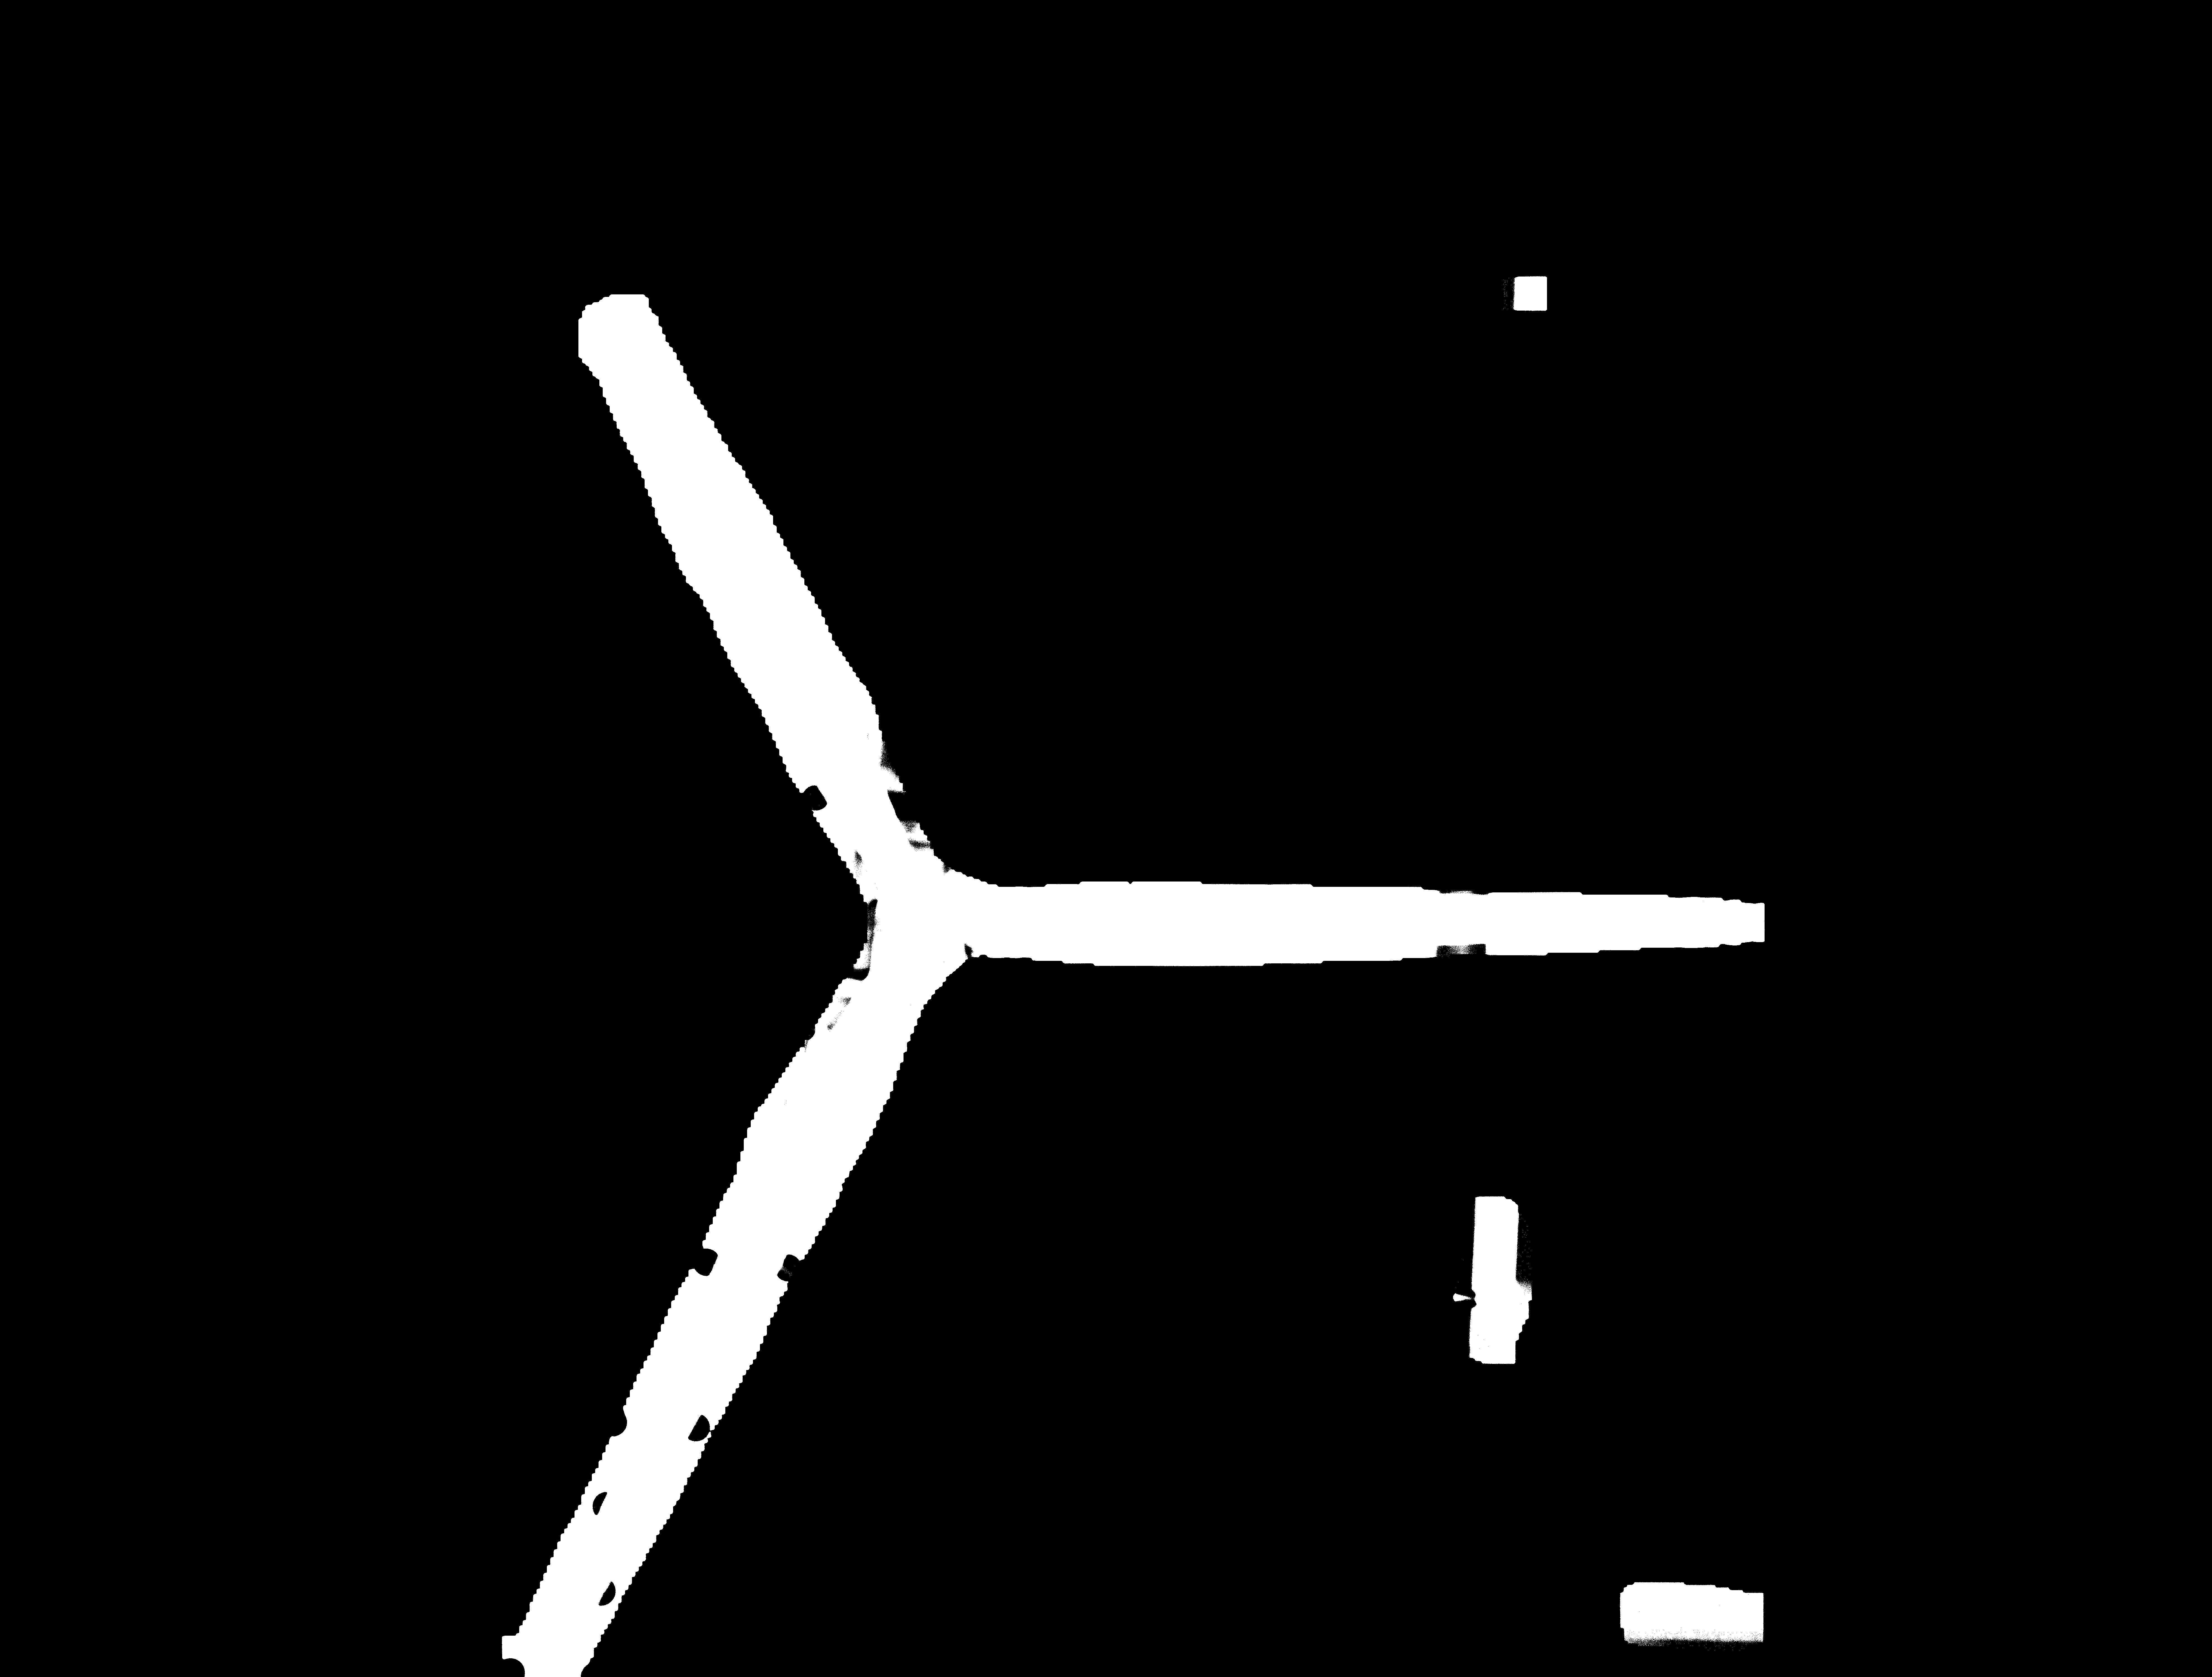

Leftmost: (1797, 5862)
Rightmost: (6318, 3328)
Topmost: (2188, 1054)
Bottommost: (1877, 6003)


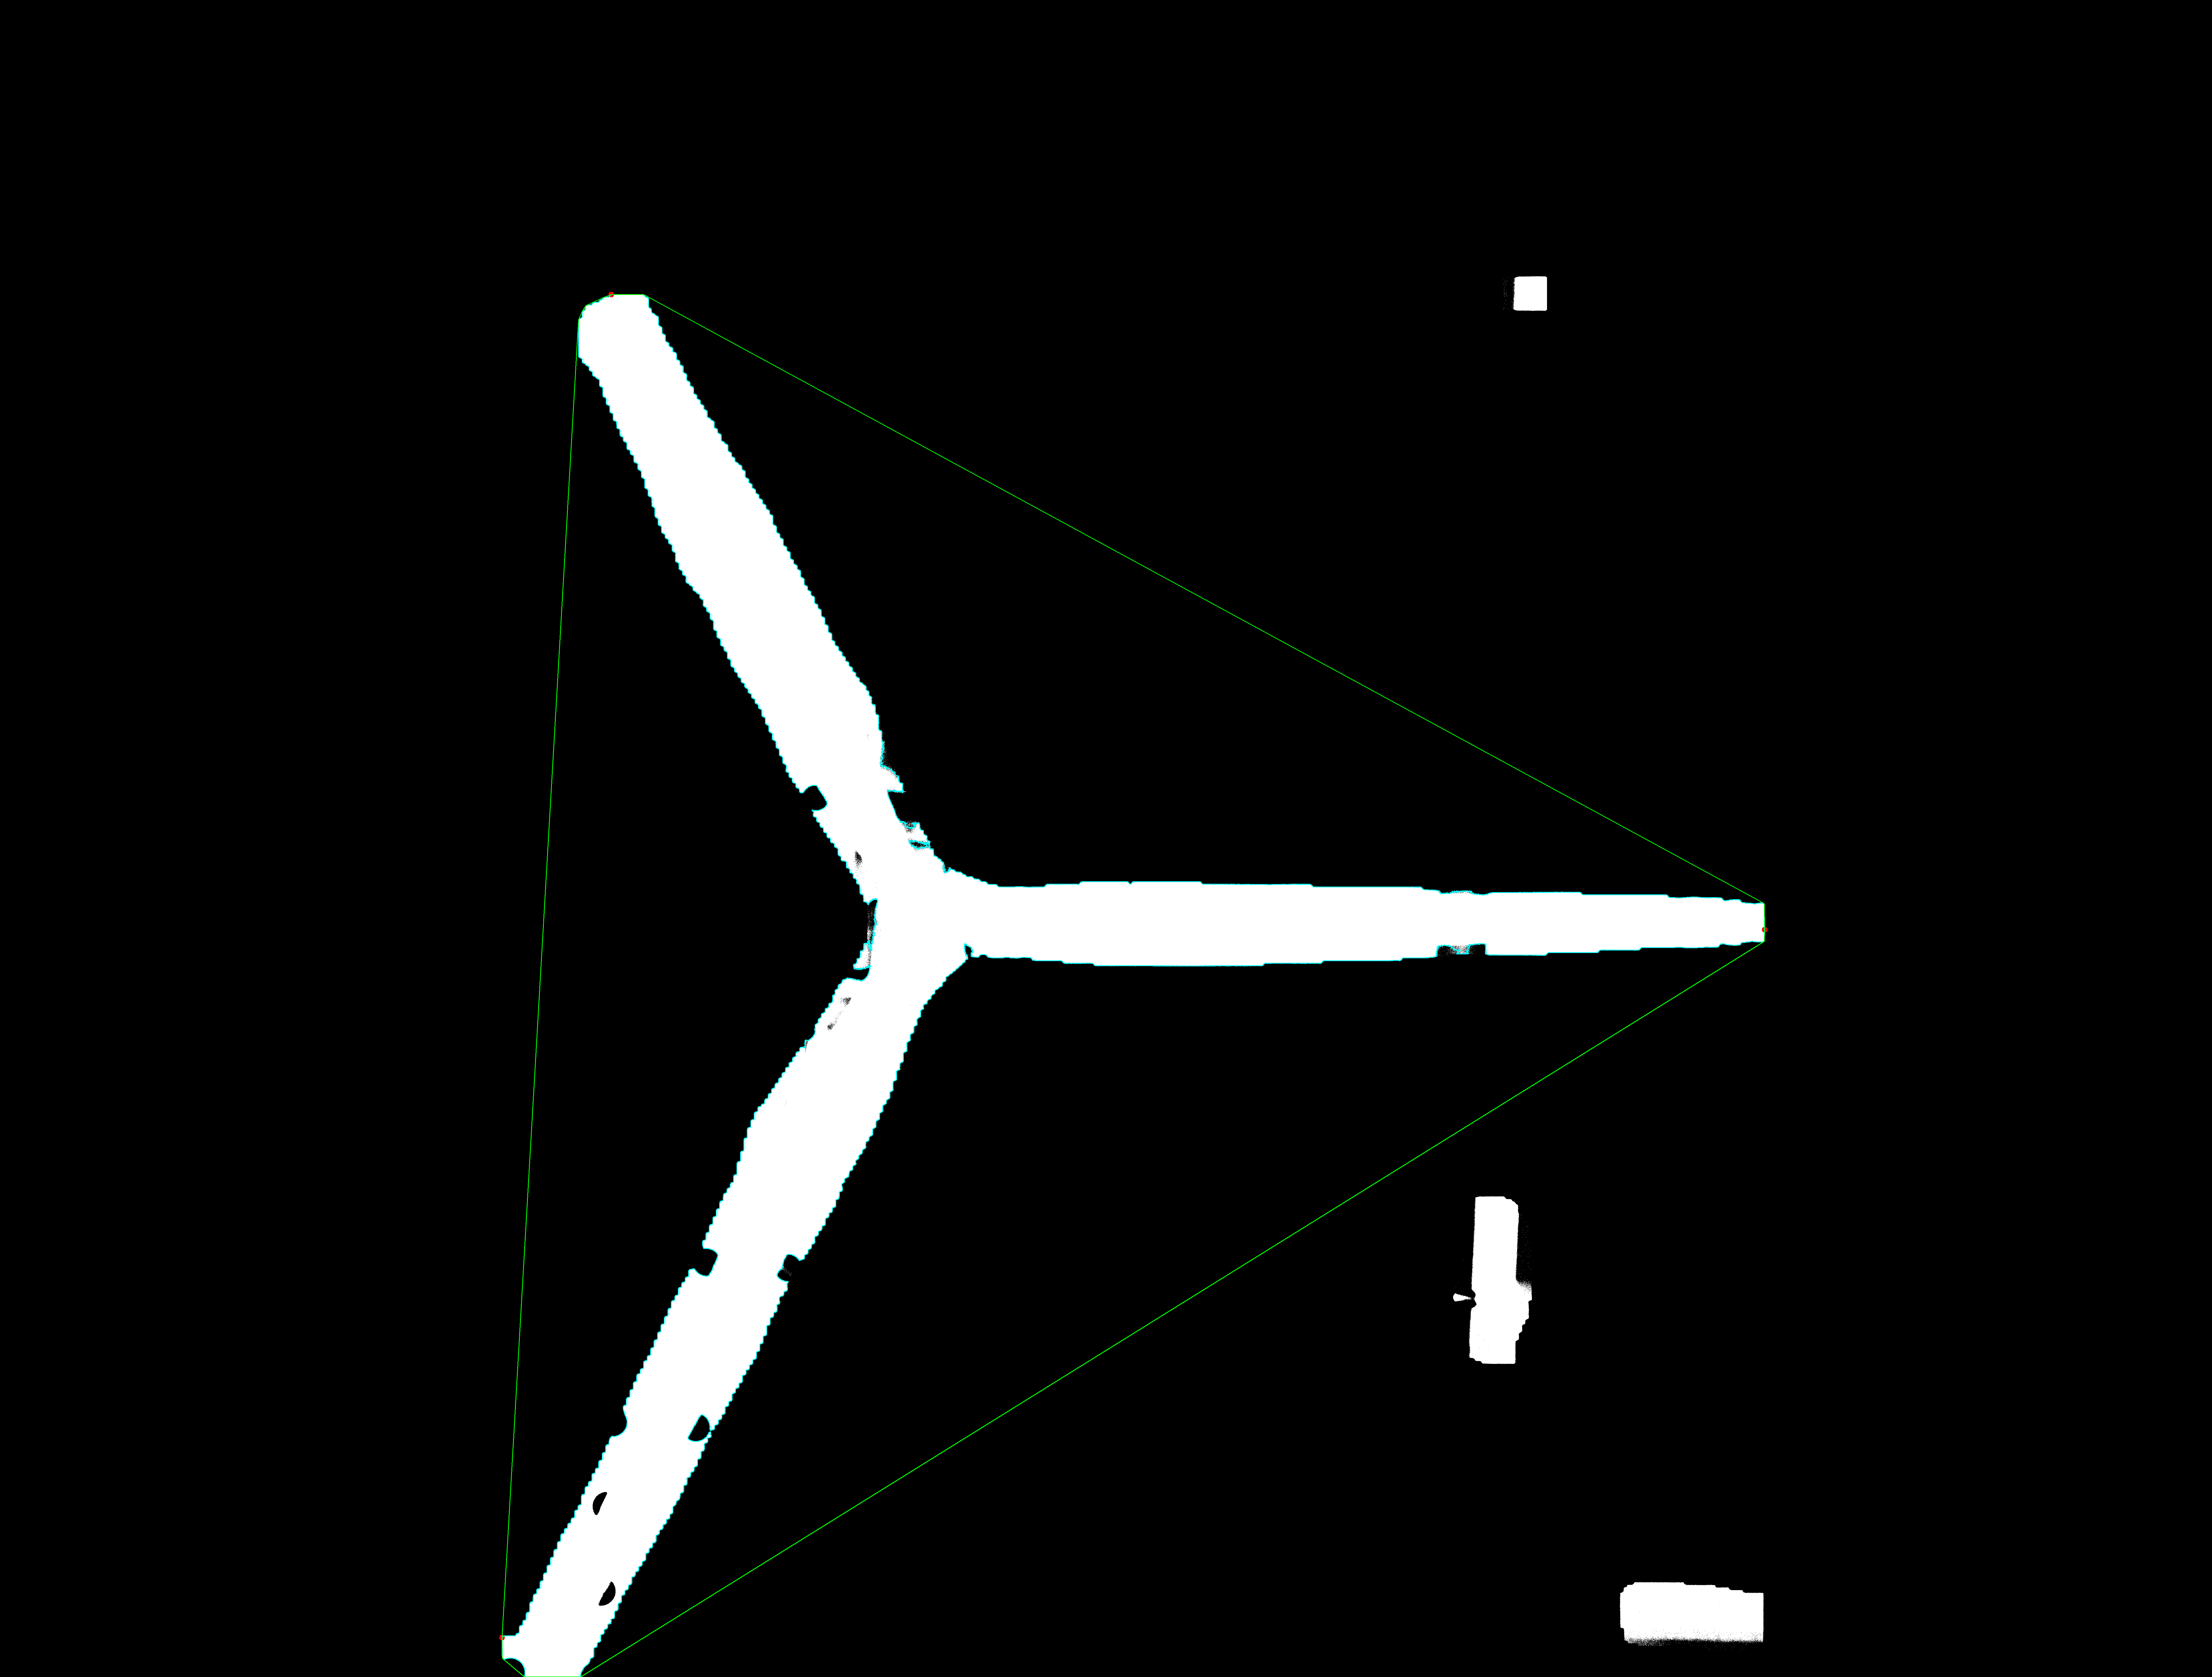

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("img.png", cv2.IMREAD_GRAYSCALE)


_, binary = cv2.threshold(image, 10, 255, cv2.THRESH_BINARY)

# Show the binary image
cv2_imshow( binary)


# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours were found
if len(contours) == 0:
    print("No contours detected. Check the input image or thresholding step.")
else:
    # Find the largest contour (most likely the white blob)
    largest_contour = max(contours, key=cv2.contourArea)

    # Find the extreme points (leftmost, rightmost, topmost, bottommost)
    leftmost = tuple(largest_contour[largest_contour[:, :, 0].argmin()][0])   # Smallest X
    rightmost = tuple(largest_contour[largest_contour[:, :, 0].argmax()][0])  # Largest X
    topmost = tuple(largest_contour[largest_contour[:, :, 1].argmin()][0])    # Smallest Y
    bottommost = tuple(largest_contour[largest_contour[:, :, 1].argmax()][0]) # Largest Y

    # Print the coordinates of the extreme points
    print(f"Leftmost: {leftmost}")
    print(f"Rightmost: {rightmost}")
    print(f"Topmost: {topmost}")
    print(f"Bottommost: {bottommost}")

    # Draw the results on the image
    output = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

    # Mark the extreme points on the image with red circles
    for point in [leftmost, rightmost, topmost]:
        cv2.circle(output, point, 10, (0, 0, 255), -1)  # Red color for points

    # Draw the contour in blue and convex hull in green
    cv2.drawContours(output, [largest_contour], -1, (255, 255, 0), 2)
    cv2.drawContours(output, [cv2.convexHull(largest_contour)], -1, (0, 255, 0), 2)

    # Show the result in Colab
    cv2_imshow(output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
